# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [ ]:
X_test = pd.read_csv("X_test.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')

In [ ]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,0
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,0
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,2
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,0
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,1
...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,2
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,0
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,0
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,1


In [ ]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

A aplicação do algoritmo de **Árvore de Decisão** começa com a **preparação dos dados**, incluindo tratamento de valores ausentes e codificação de variáveis. Em seguida, os dados são **divididos em treino e teste** para garantir uma avaliação justa do modelo. O treinamento ocorre com a definição de critérios como índice de Gini e profundidade máxima. A **avaliação do modelo** é feita por métricas como acurácia e F1-score. Para melhorar o desempenho podar a árvore ou testar outros modelos.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [ ]:
arvore_churn = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_churn.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
previsoes = arvore_churn.predict(X_train[:10])
previsoes

array([1., 0., 1., 1., 1., 0., 0., 0., 1., 0.])

In [ ]:
previsoes = arvore_churn.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 0.789986761343122


In [ ]:
from sklearn.tree import DecisionTreeClassifier

arvore_churn = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_churn.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [ ]:
#seu código aqui

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

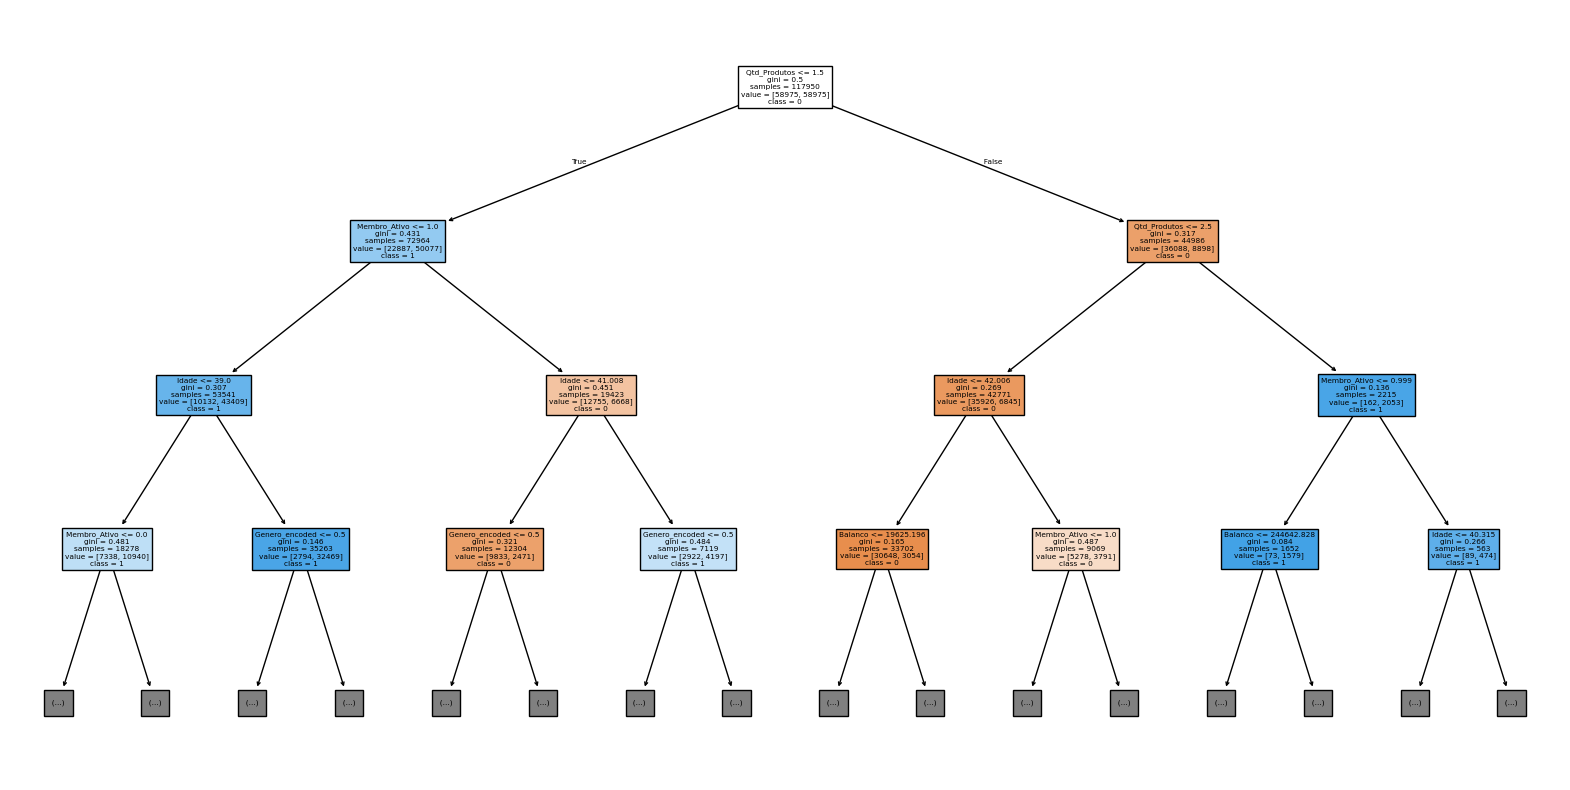

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(arvore_churn, filled=True, feature_names=X_train.columns, class_names=['0', '1'], max_depth=3)
plt.show()

A árvore de decisão tem uma profundidade de 3, conforme indicado pela contagem visual dos níveis, do nó raiz até os nós folhas. O nó raiz avalia Gini Probabilities < 0.317, com 1275 amostras e um índice de Gini de 0.5, divididas entre as classes 0 e 1. As divisões seguintes usam features como idade, genero_encoded e saldo, levando a nós folhas com alta pureza (Gini próximo de 0). A árvore é bem balanceada, com nós coloridos (azul para classe 0, laranja para classe 1) devido ao parâmetro filled=True. Isso reflete um modelo de classificação claro.

# 6) Identifique as 2 principais features do modelo.


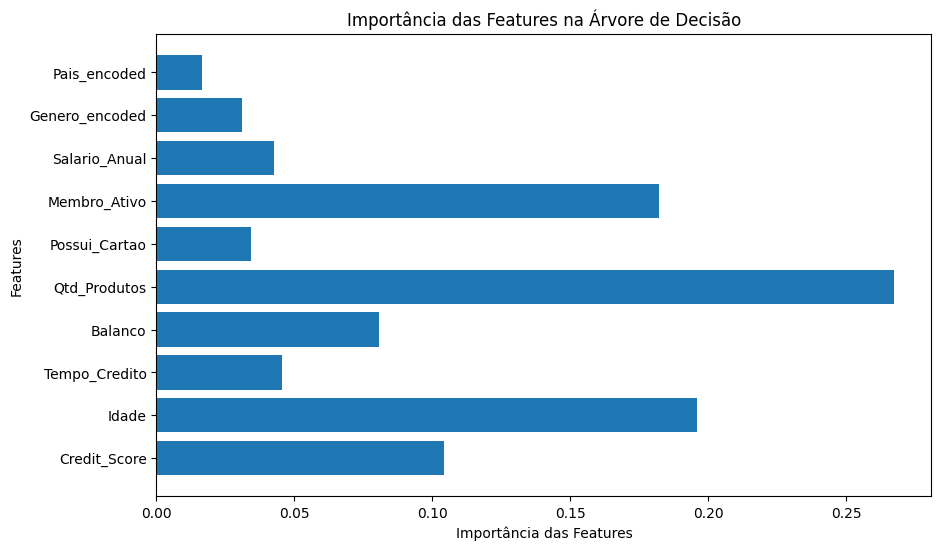

In [ ]:
importancias_features = arvore_churn.feature_importances_

nomes_features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

Dois principais features conforme grafico acima é Quantidade de produtos e Idade.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train_reduced = X_train[['Qtd_Produtos', 'Idade']]

tree_reduced = DecisionTreeClassifier(max_depth=3)
tree_reduced.fit(X_train_reduced, y_train)

X_test_reduced = X_test[['Qtd_Produtos', 'Idade']]
y_pred_reduced = tree_reduced.predict(X_test_reduced)

print("Acurácia:", accuracy_score(y_test, y_pred_reduced))
print(classification_report(y_test, y_pred_reduced))

Acurácia: 0.7776306815902435
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     19649
         1.0       0.48      0.73      0.58      5278

    accuracy                           0.78     24927
   macro avg       0.70      0.76      0.71     24927
weighted avg       0.82      0.78      0.79     24927



É provável que o desempenho da nova árvore seja ligeiramente pior que o modelo anterior, porque, embora QTD_Produtos e Idade sejam as features mais importantes, as outras features (como Saldo e Membro_Ativo) ainda adicionavam valor preditivo.



# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

A Árvore de Decisão se mostrou a escolha mais adequada para este caso específico, oferecendo não apenas melhor desempenho, mas também maior interpretabilidade através da visualização da árvore e importância das features.

A Árvore de Decisão demonstrou ser claramente superior para este problema de credit score, com:

    Melhor acurácia geral (79% vs 56%)

    Melhor balanceamento entre precision e recall

    Menos erros de classificação totais

    Maior estabilidade entre treino e teste